# Exploring and Cleaning the Hackney Subset 🧭🧹🪣

## Introduction  

One of the key issues with the [government's dataset](https://explore-education-statistics.service.gov.uk/find-statistics/apprenticeships) was the inclusion of total values within category-specific columns rather than in a separate, dedicated column. For instance, in the `ssa_tier_1`, `sex`, `ethnicity_major`, and `apps_level` columns, the dataset contained "Total" entries alongside specific categories, such as industry sectors, gender groups, ethnic backgrounds, and apprenticeship levels. This structure made it challenging to filter and analyse category-specific data without additional cleaning steps.

Moreover, discrepancies were immediately visible in the dataset, raising concerns about data consistency and accuracy. The table below is a snapshot of data filtered by the Hackney LAD.



| lad_name | ssa_tier_1 | sex   | ethnicity_major | apps_level            | starts | achievements |
|----------|------------|-------|-----------------|------------------------|--------|-------------|
| Hackney  | Total      | Total | Total           | Total                  | 960    | 460         |
| Hackney  | Total      | Total | Total           | Intermediate Appr...    | 130    | 60          |
| Hackney  | Total      | Total | Total           | Advanced Appr...        | 400    | 170         |
| Hackney  | Total      | Total | Total           | Higher Apprenticeship  | 440    | 230         |


As seen in the table above, the total number of apprenticeships for all levels was recorded as 960, but when broken down by level, the figures were:

- Intermediate Apprenticeship: 130  
- Advanced Apprenticeship: 400  
- Higher Apprenticeship: 440  

The sum of these levels is 970, which does not match the total of 960, indicating inconsistencies in how the data was recorded. The exact cause of these inconsistencies were not explained in the [documentation](https://explore-education-statistics.service.gov.uk/find-statistics/apprenticeships/data-guidance).

This notebook systematically cleans and restructures (pivots) the Hackney subset in an attempt to:

- Explain the inconsistencies
- Pivot the data in such a way that Hackney is a row indetifier so that the process can be applied to all LADs in other notebooks.

## Importing Libraries 📚🎧☕

In [1]:
import os  # For interacting with the operating system
import re  # Regular expressions for text operations
import pandas as pd  # Data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
from helpers.cleaning_helpers import remove_1val_cols, filter_only_lads, remove_missing_lads # helpers from repo

## Checking Folder for Correctness and Importing Data 📂 ⬇️

In [2]:
# Define the folder path
folder_path = "/work/LADS_data"

In [3]:
# List all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]
csv_files

['app-geography-pcon-lad-202324-q4.csv',
 'app-geography-population-202324-q4.csv',
 'lad_growth-gvt-data.csv',
 'lad_growth_with_forecast.csv',
 'app-geography-detailed-202324-q4.csv']

In [4]:
app_geography_detailed = pd.read_csv('/work/LADS_data/app-geography-detailed-202324-q4.csv')
app_geography_detailed

,time_period,time_identifier,geographic_level,country_code,country_name,region_code,region_name,lad_code,lad_name,ssa_tier_1,sex,ethnicity_major,apps_level,starts,achievements
0,202324,Academic year,National,E92000001,England,NaN,NaN,NaN,NaN,Total,Total,Total,Total,339580,178220
1,202324,Academic year,National,E92000001,England,NaN,NaN,NaN,NaN,Total,Total,Total,Intermediate Apprenticeship,70840,44020
2,202324,Academic year,National,E92000001,England,NaN,NaN,NaN,NaN,Total,Total,Total,Advanced Apprenticeship,146520,76990
3,202324,Academic year,National,E92000001,England,NaN,NaN,NaN,NaN,Total,Total,Total,Higher Apprenticeship,122230,57220
4,202324,Academic year,National,E92000001,England,NaN,NaN,NaN,NaN,Total,Total,Asian / Asian British,Total,24730,10670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482939,202324,Academic year,Local authority district,E92000001,England,E12000003,Yorkshire and The Humber,E06000014,York,Social Sciences,Not App/ Known,White,Higher Apprenticeship,low,low
482940,202324,Academic year,Local authority district,E92000001,England,E12000003,Yorkshire and The Humber,E06000014,York,Social Sciences,Not App/ Known,Unknown,Total,low,low
482941,202324,Academic year,Local authority district,E92000001,England,E12000003,Yorkshire and The Humber,E06000014,York,Social Sciences,Not App/ Known,Unknown,Intermediate Apprenticeship,low,low
482942,202324,Academic year,Local authority district,E92000001,England,E12000003,Yorkshire and The Humber,E06000014,York,Social Sciences,Not App/ Known,Unknown,Advanced Apprenticeship,low,low


## Hackney as an Example 🧩

### Filter only Hackney Data ⚗️

In [5]:
hackney_data = app_geography_detailed[app_geography_detailed['lad_name'] == 'Hackney'].copy()
hackney_data

,time_period,time_identifier,geographic_level,country_code,country_name,region_code,region_name,lad_code,lad_name,ssa_tier_1,sex,ethnicity_major,apps_level,starts,achievements
159936,202324,Academic year,Local authority district,E92000001,England,E12000007,London,E09000012,Hackney,Total,Total,Total,Total,960,460
159937,202324,Academic year,Local authority district,E92000001,England,E12000007,London,E09000012,Hackney,Total,Total,Total,Intermediate Apprenticeship,130,60
159938,202324,Academic year,Local authority district,E92000001,England,E12000007,London,E09000012,Hackney,Total,Total,Total,Advanced Apprenticeship,400,170
159939,202324,Academic year,Local authority district,E92000001,England,E12000007,London,E09000012,Hackney,Total,Total,Total,Higher Apprenticeship,440,230
159940,202324,Academic year,Local authority district,E92000001,England,E12000007,London,E09000012,Hackney,Total,Total,Asian / Asian British,Total,110,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161499,202324,Academic year,Local authority district,E92000001,England,E12000007,London,E09000012,Hackney,Social Sciences,Not App/ Known,White,Higher Apprenticeship,low,low
161500,202324,Academic year,Local authority district,E92000001,England,E12000007,London,E09000012,Hackney,Social Sciences,Not App/ Known,Unknown,Total,low,low
161501,202324,Academic year,Local authority district,E92000001,England,E12000007,London,E09000012,Hackney,Social Sciences,Not App/ Known,Unknown,Intermediate Apprenticeship,low,low
161502,202324,Academic year,Local authority district,E92000001,England,E12000007,London,E09000012,Hackney,Social Sciences,Not App/ Known,Unknown,Advanced Apprenticeship,low,low


### Cleaning Hackney Data Types 🧹 🆎

In [6]:
hackney_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1568 entries, 159936 to 161503
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   time_period       1568 non-null   int64 
 1   time_identifier   1568 non-null   object
 2   geographic_level  1568 non-null   object
 3   country_code      1568 non-null   object
 4   country_name      1568 non-null   object
 5   region_code       1568 non-null   object
 6   region_name       1568 non-null   object
 7   lad_code          1568 non-null   object
 8   lad_name          1568 non-null   object
 9   ssa_tier_1        1568 non-null   object
 10  sex               1568 non-null   object
 11  ethnicity_major   1568 non-null   object
 12  apps_level        1568 non-null   object
 13  starts            1568 non-null   object
 14  achievements      1568 non-null   object
dtypes: int64(1), object(14)
memory usage: 196.0+ KB


The results from running the `.info()` method clearly show that every column contains data of type object, which is Pandas' equivalent of string, text. 

From the data guidance, we know that `starts` and `achievements` should be numerical values. The `starts` column represents the number of apprenticeships started in a particular category in the 2023-24 academic year, while `achievements` shows the number of apprentices who have completed their apprenticeships. The first step in exploring the data further is to check their unique values. This will help verify whether all entries are indeed numbers or if there are any unexpected text values that need to be handled.

In [7]:
hackney_data["starts"].unique()

array(['960', '130', '400', '440', '110', '10', '60', '50', '260', '40',
       '100', '30', '20', '420', '160', '220', 'low', '550', '240', '150',
       '70', '250', '410', '180', '90', '320', '120', '200', '170', '190',
       '80', '140'], dtype=object)

In [8]:
hackney_data["achievements"].unique()

array(['460', '60', '170', '230', '10', '30', '120', '50', '40', '20',
       'low', '210', '70', '130', '270', '110', '140', '180', '90', '160',
       '80', '100'], dtype=object)

The results from checking the unique values in the `starts` and `achievements` columns show that both contain the string `"low"` alongside numeric strings. According to [The Data Guidance for Achievement Rates (Footnotes)](https://explore-education-statistics.service.gov.uk/find-statistics/further-education-and-skills/2022-23/data-guidance), `"low"` represents values between 0 and 4. Imputation was initially considered, but further research revealed that the missing data is likely not accidental. Instead, it is likely that the government deliberately suppresses low values to prevent re-identification of individuals. Given this, imputing these values would not only introduce artificial data but also go against the intended confidentiality measures. Moreover, precise imputation is impossible as the actual distribution of these values is unknown. Finally, since the data is not being used for trend predictions, there is no strong justification for imputation. The best approach, therefore, is to replace `"low"` with `0`, ensuring consistency with the original dataset while allowing numerical analysis.


In [9]:
# Replacing "low" values in "starts" with 0 for Hackney data
hackney_data["starts"] = pd.to_numeric(hackney_data["starts"], errors="coerce").fillna(0).astype(int)
hackney_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1568 entries, 159936 to 161503
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   time_period       1568 non-null   int64 
 1   time_identifier   1568 non-null   object
 2   geographic_level  1568 non-null   object
 3   country_code      1568 non-null   object
 4   country_name      1568 non-null   object
 5   region_code       1568 non-null   object
 6   region_name       1568 non-null   object
 7   lad_code          1568 non-null   object
 8   lad_name          1568 non-null   object
 9   ssa_tier_1        1568 non-null   object
 10  sex               1568 non-null   object
 11  ethnicity_major   1568 non-null   object
 12  apps_level        1568 non-null   object
 13  starts            1568 non-null   int64 
 14  achievements      1568 non-null   object
dtypes: int64(2), object(13)
memory usage: 196.0+ KB


In [10]:
# Step 2: Replace "low" values in "achievements" with 0 for Hackney data
hackney_data["achievements"] = pd.to_numeric(hackney_data["achievements"], errors="coerce").fillna(0).astype(int)
hackney_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1568 entries, 159936 to 161503
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   time_period       1568 non-null   int64 
 1   time_identifier   1568 non-null   object
 2   geographic_level  1568 non-null   object
 3   country_code      1568 non-null   object
 4   country_name      1568 non-null   object
 5   region_code       1568 non-null   object
 6   region_name       1568 non-null   object
 7   lad_code          1568 non-null   object
 8   lad_name          1568 non-null   object
 9   ssa_tier_1        1568 non-null   object
 10  sex               1568 non-null   object
 11  ethnicity_major   1568 non-null   object
 12  apps_level        1568 non-null   object
 13  starts            1568 non-null   int64 
 14  achievements      1568 non-null   int64 
dtypes: int64(3), object(12)
memory usage: 196.0+ KB


## Exploring the Descrepancies in Totals 📈

The table below is a Markdownn snapshot of data filtered by the Hackney LAD.

| lad_name | ssa_tier_1 | sex   | ethnicity_major | apps_level            | starts | achievements |
|----------|------------|-------|-----------------|------------------------|--------|-------------|
| Hackney  | Total      | Total | Total           | Total                  | 960    | 460         |
| Hackney  | Total      | Total | Total           | Intermediate Appr...    | 130    | 60          |
| Hackney  | Total      | Total | Total           | Advanced Appr...        | 400    | 170         |
| Hackney  | Total      | Total | Total           | Higher Apprenticeship  | 440    | 230         |

The cells below attempt to calculate the sum of `starts` for each level and see if the totals match the actual sum of `starts.` 

In [11]:
df = hackney_data.copy()

higher_apps_filtered_sum = df[
    (df['apps_level'].str.contains("Higher", na=False)) &  # Only Higher-level apprenticeships
    (df['ssa_tier_1'] != 'Total') &
    (df['sex'] != 'Total') &
    (df['ethnicity_major'] != 'Total')
]['starts'].sum()

higher_apps_filtered_sum


420

The calculated sum of `starts` for Higher Apprenticeships is **420**, while the reported total in the table is **440**, resulting in a discrepancy of **20**. This difference is likely due to the suppression of small values by the government after the totals were already recorded. Since the decision was made not to impute missing values, small discrepancies like this are expected. While the total can still be used as a reference to check calculations for correctness, it should be interpreted with an awareness of the expected margin of error due to data suppression.

In [12]:
advanced_apps_filtered_sum = df[
    (df['apps_level'].str.contains("Advanced", na=False)) &  # Only Advanced apprenticeships
    (df['ssa_tier_1'] != 'Total') &
    (df['sex'] != 'Total') &
    (df['ethnicity_major'] != 'Total')
]['starts'].sum()

# Compute sum of 'starts' for Intermediate Apprenticeships
intermediate_apps_filtered_sum = df[
    (df['apps_level'].str.contains("Intermediate", na=False)) &  # Only Intermediate apprenticeships
    (df['ssa_tier_1'] != 'Total') &
    (df['sex'] != 'Total') &
    (df['ethnicity_major'] != 'Total')
]['starts'].sum()
advanced_apps_filtered_sum, intermediate_apps_filtered_sum

(370, 110)

The calculated sum of `starts` for Advanced Apprenticeships is **370**, while for Intermediate Apprenticeships, it is **110**. Comparing these values with the reported totals in the table, there is a discrepancy of **30** for Advanced Apprenticeships and **20** for Intermediate Apprenticeships. As seen with the Higher Apprenticeship category, these differences are likely due to the suppression of small values (`"low"`) in the dataset. Since suppressed values were excluded from the calculations, the computed sums are slightly lower than the reported totals. Given the decision not to impute missing values, these small differences are expected.

## Removing Sex and Ethnicity Data from the Hackney Subset 🗑️

To ensure that the dataset contains only relevant information for future clustering, it is important to reduce unnecessary dimensions. Since the focus is on overall apprenticeship engagement rather than demographic breakdowns, the `sex` and `ethnicity_major` columns would add redundancy without providing additional value. By filtering for rows where both values are `"Total"` and then dropping these columns, we maintain the dataset’s integrity while simplifying the structure for more efficient analysis.


In [13]:
hackney_data = hackney_data[
    (hackney_data["sex"] == "Total") & (hackney_data["ethnicity_major"] == "Total")
].copy()

hackney_data = hackney_data.drop(columns=["sex", "ethnicity_major"])
hackney_data

,time_period,time_identifier,geographic_level,country_code,country_name,region_code,region_name,lad_code,lad_name,ssa_tier_1,apps_level,starts,achievements
159936,202324,Academic year,Local authority district,E92000001,England,E12000007,London,E09000012,Hackney,Total,Total,960,460
159937,202324,Academic year,Local authority district,E92000001,England,E12000007,London,E09000012,Hackney,Total,Intermediate Apprenticeship,130,60
159938,202324,Academic year,Local authority district,E92000001,England,E12000007,London,E09000012,Hackney,Total,Advanced Apprenticeship,400,170
159939,202324,Academic year,Local authority district,E92000001,England,E12000007,London,E09000012,Hackney,Total,Higher Apprenticeship,440,230
160048,202324,Academic year,Local authority district,E92000001,England,E12000007,London,E09000012,Hackney,"Agriculture, Horticulture and Animal Care",Total,10,0
160049,202324,Academic year,Local authority district,E92000001,England,E12000007,London,E09000012,Hackney,"Agriculture, Horticulture and Animal Care",Intermediate Apprenticeship,10,0
160050,202324,Academic year,Local authority district,E92000001,England,E12000007,London,E09000012,Hackney,"Agriculture, Horticulture and Animal Care",Advanced Apprenticeship,0,0
160051,202324,Academic year,Local authority district,E92000001,England,E12000007,London,E09000012,Hackney,"Agriculture, Horticulture and Animal Care",Higher Apprenticeship,0,0
160160,202324,Academic year,Local authority district,E92000001,England,E12000007,London,E09000012,Hackney,"Arts, Media and Publishing",Total,10,10
160161,202324,Academic year,Local authority district,E92000001,England,E12000007,London,E09000012,Hackney,"Arts, Media and Publishing",Intermediate Apprenticeship,0,0


## Checking Hackney Totals before Pivoting

In [14]:
advanced_filtered_sum = hackney_data[
    (hackney_data['apps_level'] == 'Advanced Apprenticeship') &
    (hackney_data['ssa_tier_1'] != 'Total')
]['starts'].sum()

higher_filtered_sum = hackney_data[
    (hackney_data['apps_level'] == 'Higher Apprenticeship') &
    (hackney_data['ssa_tier_1'] != 'Total')
]['starts'].sum()

intermediate_filtered_sum = hackney_data[
    (hackney_data['apps_level'] == 'Intermediate Apprenticeship') &
    (hackney_data['ssa_tier_1'] != 'Total')
]['starts'].sum()

advanced_filtered_sum, higher_filtered_sum, intermediate_filtered_sum

(420, 440, 130)

## Removing All "Total" Values for Pivoting

To ensure the dataset is structured correctly for pivoting, all rows where `ssa_tier_1` or `apps_level` contain `"Total"` have to be removed. Keeping these totals would lead to duplication when reshaping the data, as they aggregate values already present in individual categories. 


In [15]:
hackney_data = hackney_data[
    ~(hackney_data["ssa_tier_1"].str.contains("Total", na=False)) & 
    ~(hackney_data["apps_level"].str.contains("Total", na=False))
]
hackney_data

,time_period,time_identifier,geographic_level,country_code,country_name,region_code,region_name,lad_code,lad_name,ssa_tier_1,apps_level,starts,achievements
160049,202324,Academic year,Local authority district,E92000001,England,E12000007,London,E09000012,Hackney,"Agriculture, Horticulture and Animal Care",Intermediate Apprenticeship,10,0
160050,202324,Academic year,Local authority district,E92000001,England,E12000007,London,E09000012,Hackney,"Agriculture, Horticulture and Animal Care",Advanced Apprenticeship,0,0
160051,202324,Academic year,Local authority district,E92000001,England,E12000007,London,E09000012,Hackney,"Agriculture, Horticulture and Animal Care",Higher Apprenticeship,0,0
160161,202324,Academic year,Local authority district,E92000001,England,E12000007,London,E09000012,Hackney,"Arts, Media and Publishing",Intermediate Apprenticeship,0,0
160162,202324,Academic year,Local authority district,E92000001,England,E12000007,London,E09000012,Hackney,"Arts, Media and Publishing",Advanced Apprenticeship,10,10
160163,202324,Academic year,Local authority district,E92000001,England,E12000007,London,E09000012,Hackney,"Arts, Media and Publishing",Higher Apprenticeship,0,0
160273,202324,Academic year,Local authority district,E92000001,England,E12000007,London,E09000012,Hackney,"Business, Administration and Law",Intermediate Apprenticeship,0,10
160274,202324,Academic year,Local authority district,E92000001,England,E12000007,London,E09000012,Hackney,"Business, Administration and Law",Advanced Apprenticeship,120,60
160275,202324,Academic year,Local authority district,E92000001,England,E12000007,London,E09000012,Hackney,"Business, Administration and Law",Higher Apprenticeship,200,90
160385,202324,Academic year,Local authority district,E92000001,England,E12000007,London,E09000012,Hackney,"Construction, Planning and the Built Environment",Intermediate Apprenticeship,20,10


## Pivoting Hackney by the LAD (Hackney)

### Pivoting `starts` and `achievements` by `apps_level`

In [16]:
pivot_starts_by_level = hackney_data.pivot_table(
    index=['lad_code', 'lad_name'],  # Keep Hackney a row identifier
    columns=['apps_level'],  # Columns to pivot
    values='starts',  # The values to populate the pivoted table
    aggfunc='sum',  # Sum values for each apps_level
    fill_value=0  # Fill missing values with 0
)

# Reset the index to make 'lad_code' and 'lad_name' regular columns
pivot_starts_by_level = pivot_starts_by_level.reset_index()

pivot_starts_by_level

apps_level,lad_code,lad_name,Advanced Apprenticeship,Higher Apprenticeship,Intermediate Apprenticeship
0,E09000012,Hackney,420,440,130


In [17]:
pivot_achievements_by_level = hackney_data.pivot_table(
    index=['lad_code', 'lad_name'],  # Keep Hackney a row identifier
    columns=['apps_level'],  # Columns to pivot
    values='achievements',  # The values to populate the pivoted table
    aggfunc='sum',  # Sum values for each apps_level
    fill_value=0  # Fill missing values with 0
)

# Reset the index to make 'lad_code' and 'lad_name' regular columns
pivot_achievements_by_level = pivot_achievements_by_level.reset_index()
pivot_achievements_by_level

apps_level,lad_code,lad_name,Advanced Apprenticeship,Higher Apprenticeship,Intermediate Apprenticeship
0,E09000012,Hackney,170,220,60


### Merging the two pivoted by `apps_level` tables for Hackney

In [18]:
combined_levels_pivot = pd.merge(
    pivot_starts_by_level,  # First pivot (starts)
    pivot_achievements_by_level,  # Second pivot (achievements)
    on=['lad_code', 'lad_name'],  # Merge on these columns
    suffixes=('_starts', '_achievements')  # Add suffixes to distinguish columns
)
combined_levels_pivot

apps_level,lad_code,lad_name,Advanced Apprenticeship_starts,Higher Apprenticeship_starts,Intermediate Apprenticeship_starts,Advanced Apprenticeship_achievements,Higher Apprenticeship_achievements,Intermediate Apprenticeship_achievements
0,E09000012,Hackney,420,440,130,170,220,60


### Renaming Levels Columns for Clarity


In [19]:
combined_levels_pivot = combined_levels_pivot.rename(columns={
    "Advanced Apprenticeship_starts": "Advanced Starts",
    "Higher Apprenticeship_starts": "Higher Starts",
    "Intermediate Apprenticeship_starts": "Intermediate Starts",
    "Total_starts": "Total Starts",
    "Advanced Apprenticeship_achievements": "Advanced Achievements",
    "Higher Apprenticeship_achievements": "Higher Achievements",
    "Intermediate Apprenticeship_achievements": "Intermediate Achievements",
    "Total_achievements": "Total Achievements"
})

combined_levels_pivot

apps_level,lad_code,lad_name,Advanced Starts,Higher Starts,Intermediate Starts,Advanced Achievements,Higher Achievements,Intermediate Achievements
0,E09000012,Hackney,420,440,130,170,220,60


### Pivoting `starts` and `achievements` by `ssa_tier_1`

In [20]:
# Pivot for starts by ssa_tier_1
pivot_starts_by_ssa_tier = hackney_data.pivot_table(
    index=['lad_code', 'lad_name'],  # Keep Hackney's identifier
    columns=['ssa_tier_1'],  # Columns to pivot
    values='starts',  # The values to populate the pivoted table
    aggfunc='sum',  # Sum values for each apps_level
    fill_value=0  # Fill missing values with 0
)

# Reset the index to make 'lad_code' and 'lad_name' regular columns
pivot_starts_by_ssa_tier = pivot_starts_by_ssa_tier.reset_index()

pivot_starts_by_ssa_tier

ssa_tier_1,lad_code,lad_name,"Agriculture, Horticulture and Animal Care","Arts, Media and Publishing","Business, Administration and Law","Construction, Planning and the Built Environment",Education and Training,Engineering and Manufacturing Technologies,"Health, Public Services and Care","History, Philosophy and Theology",Information and Communication Technology,"Leisure, Travel and Tourism",Retail and Commercial Enterprise,Science and Mathematics,Social Sciences
0,E09000012,Hackney,10,10,320,60,40,60,260,0,140,10,80,0,0


In [21]:
# Pivot for starts by ssa_tier_1
pivot_achievements_by_ssa_tier = hackney_data.pivot_table(
    index=['lad_code', 'lad_name'],  # Keep Hackney's identifier
    columns=['ssa_tier_1'],  # Columns to pivot
    values='achievements',  # The values to populate the pivoted table
    aggfunc='sum',  # Sum values for each apps_level
    fill_value=0  # Fill missing values with 0
)

# Reset the index to make 'lad_code' and 'lad_name' regular columns
pivot_achievements_by_ssa_tier = pivot_achievements_by_ssa_tier.reset_index()

pivot_achievements_by_ssa_tier

ssa_tier_1,lad_code,lad_name,"Agriculture, Horticulture and Animal Care","Arts, Media and Publishing","Business, Administration and Law","Construction, Planning and the Built Environment",Education and Training,Engineering and Manufacturing Technologies,"Health, Public Services and Care","History, Philosophy and Theology",Information and Communication Technology,"Leisure, Travel and Tourism",Retail and Commercial Enterprise,Science and Mathematics,Social Sciences
0,E09000012,Hackney,0,10,160,20,30,30,100,0,80,0,20,0,0


### Merging the two pivoted by `ssa_tier_1` tables

In [22]:
combined_ssa_tier_pivot = pd.merge(
    pivot_starts_by_ssa_tier, pivot_achievements_by_ssa_tier,
    on=['lad_code', 'lad_name'],
    suffixes=('_starts', '_achievements')
)
combined_ssa_tier_pivot

ssa_tier_1,lad_code,lad_name,"Agriculture, Horticulture and Animal Care_starts","Arts, Media and Publishing_starts","Business, Administration and Law_starts","Construction, Planning and the Built Environment_starts",Education and Training_starts,Engineering and Manufacturing Technologies_starts,"Health, Public Services and Care_starts","History, Philosophy and Theology_starts",...,"Construction, Planning and the Built Environment_achievements",Education and Training_achievements,Engineering and Manufacturing Technologies_achievements,"Health, Public Services and Care_achievements","History, Philosophy and Theology_achievements",Information and Communication Technology_achievements,"Leisure, Travel and Tourism_achievements",Retail and Commercial Enterprise_achievements,Science and Mathematics_achievements,Social Sciences_achievements
0,E09000012,Hackney,10,10,320,60,40,60,260,0,...,20,30,30,100,0,80,0,20,0,0


In [23]:
rename_dict = {
    'Agriculture, Horticulture and Animal Care_starts': 'Agriculture Starts',
    'Arts, Media and Publishing_starts': 'Arts Starts',
    'Business, Administration and Law_starts': 'Business Starts',
    'Construction, Planning and the Built Environment_starts': 'Construction Starts',
    'Education and Training_starts': 'Education Starts',
    'Engineering and Manufacturing Technologies_starts': 'Engineering Starts',
    'Health, Public Services and Care_starts': 'Health Starts',
    'History, Philosophy and Theology_starts': 'History Starts',
    'Information and Communication Technology_starts': 'ICT Starts',
    'Leisure, Travel and Tourism_starts': 'Leisure Starts',
    'Retail and Commercial Enterprise_starts': 'Retail Starts',
    'Science and Mathematics_starts': 'Science Starts',
    'Social Sciences_starts': 'Social Sciences Starts',
    'Agriculture, Horticulture and Animal Care_achievements': 'Agriculture Achievements',
    'Arts, Media and Publishing_achievements': 'Arts Achievements',
    'Business, Administration and Law_achievements': 'Business Achievements',
    'Construction, Planning and the Built Environment_achievements': 'Construction Achievements',
    'Education and Training_achievements': 'Education Achievements',
    'Engineering and Manufacturing Technologies_achievements': 'Engineering Achievements',
    'Health, Public Services and Care_achievements': 'Health Achievements',
    'History, Philosophy and Theology_achievements': 'History Achievements',
    'Information and Communication Technology_achievements': 'ICT Achievements',
    'Leisure, Travel and Tourism_achievements': 'Leisure Achievements',
    'Retail and Commercial Enterprise_achievements': 'Retail Achievements',
    'Science and Mathematics_achievements': 'Science Achievements',
    'Social Sciences_achievements': 'Social Sciences Achievements'
}

combined_ssa_tier_pivot = combined_ssa_tier_pivot.rename(columns=rename_dict)
combined_ssa_tier_pivot

ssa_tier_1,lad_code,lad_name,Agriculture Starts,Arts Starts,Business Starts,Construction Starts,Education Starts,Engineering Starts,Health Starts,History Starts,...,Construction Achievements,Education Achievements,Engineering Achievements,Health Achievements,History Achievements,ICT Achievements,Leisure Achievements,Retail Achievements,Science Achievements,Social Sciences Achievements
0,E09000012,Hackney,10,10,320,60,40,60,260,0,...,20,30,30,100,0,80,0,20,0,0


### Merging the two pivoted by `apps_level` and `ssa_tier_1` tables

In [24]:
combined_hackney  = pd.merge(
    combined_ssa_tier_pivot,  # First pivot (starts)
    combined_levels_pivot,  # Second pivot (achievements)
    on=['lad_code', 'lad_name'],  # Merge on these columns
)
combined_hackney

,lad_code,lad_name,Agriculture Starts,Arts Starts,Business Starts,Construction Starts,Education Starts,Engineering Starts,Health Starts,History Starts,...,Leisure Achievements,Retail Achievements,Science Achievements,Social Sciences Achievements,Advanced Starts,Higher Starts,Intermediate Starts,Advanced Achievements,Higher Achievements,Intermediate Achievements
0,E09000012,Hackney,10,10,320,60,40,60,260,0,...,0,20,0,0,420,440,130,170,220,60


## Plotting Hackney Data 📊

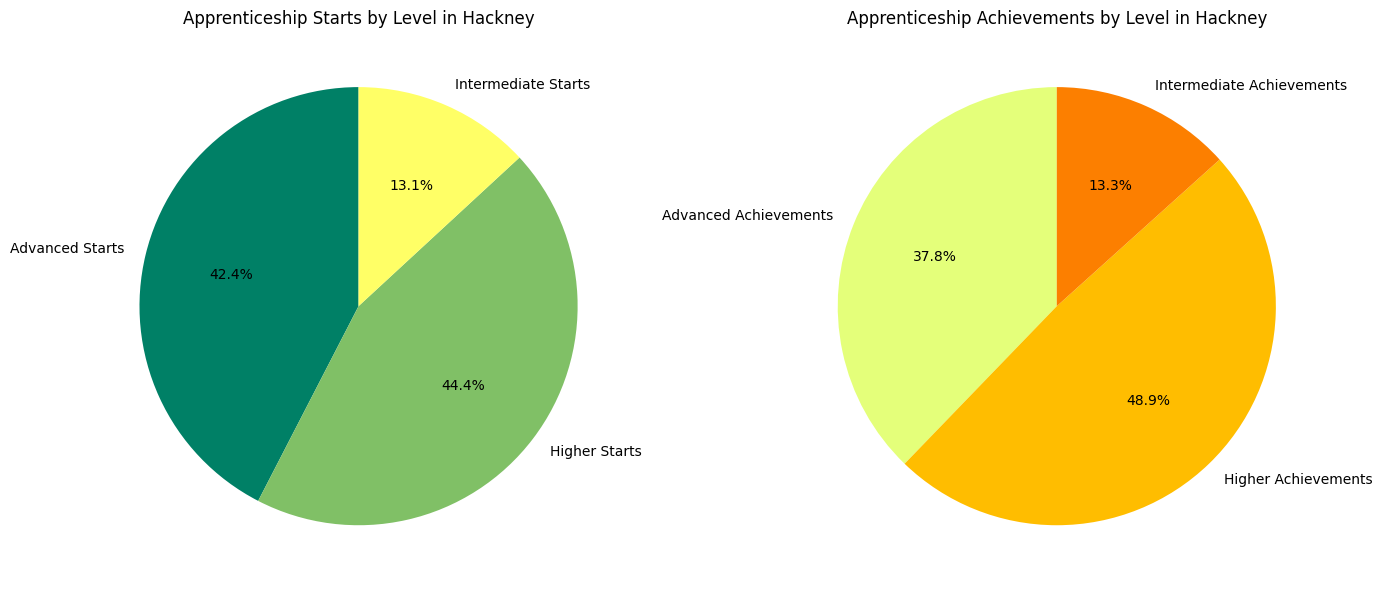

In [25]:
# Filter only level-based starts and achievements
level_starts = combined_hackney[['Advanced Starts', 'Higher Starts', 'Intermediate Starts']].sum()
level_achievements = combined_hackney[['Advanced Achievements', 'Higher Achievements', 'Intermediate Achievements']].sum()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

level_starts.plot(kind='pie', autopct='%1.1f%%', ax=axes[0], cmap='summer', startangle=90)
axes[0].set_ylabel("")
axes[0].set_title("Apprenticeship Starts by Level in Hackney")

level_achievements.plot(kind='pie', autopct='%1.1f%%', ax=axes[1], cmap='Wistia', startangle=90)
axes[1].set_ylabel("")
axes[1].set_title("Apprenticeship Achievements by Level in Hackney")

plt.tight_layout()
plt.show()

In [26]:
combined_hackney.columns

Index(['lad_code', 'lad_name', 'Agriculture Starts', 'Arts Starts',
       'Business Starts', 'Construction Starts', 'Education Starts',
       'Engineering Starts', 'Health Starts', 'History Starts', 'ICT Starts',
       'Leisure Starts', 'Retail Starts', 'Science Starts',
       'Social Sciences Starts', 'Agriculture Achievements',
       'Arts Achievements', 'Business Achievements',
       'Construction Achievements', 'Education Achievements',
       'Engineering Achievements', 'Health Achievements',
       'History Achievements', 'ICT Achievements', 'Leisure Achievements',
       'Retail Achievements', 'Science Achievements',
       'Social Sciences Achievements', 'Advanced Starts', 'Higher Starts',
       'Intermediate Starts', 'Advanced Achievements', 'Higher Achievements',
       'Intermediate Achievements'],
      dtype='object')

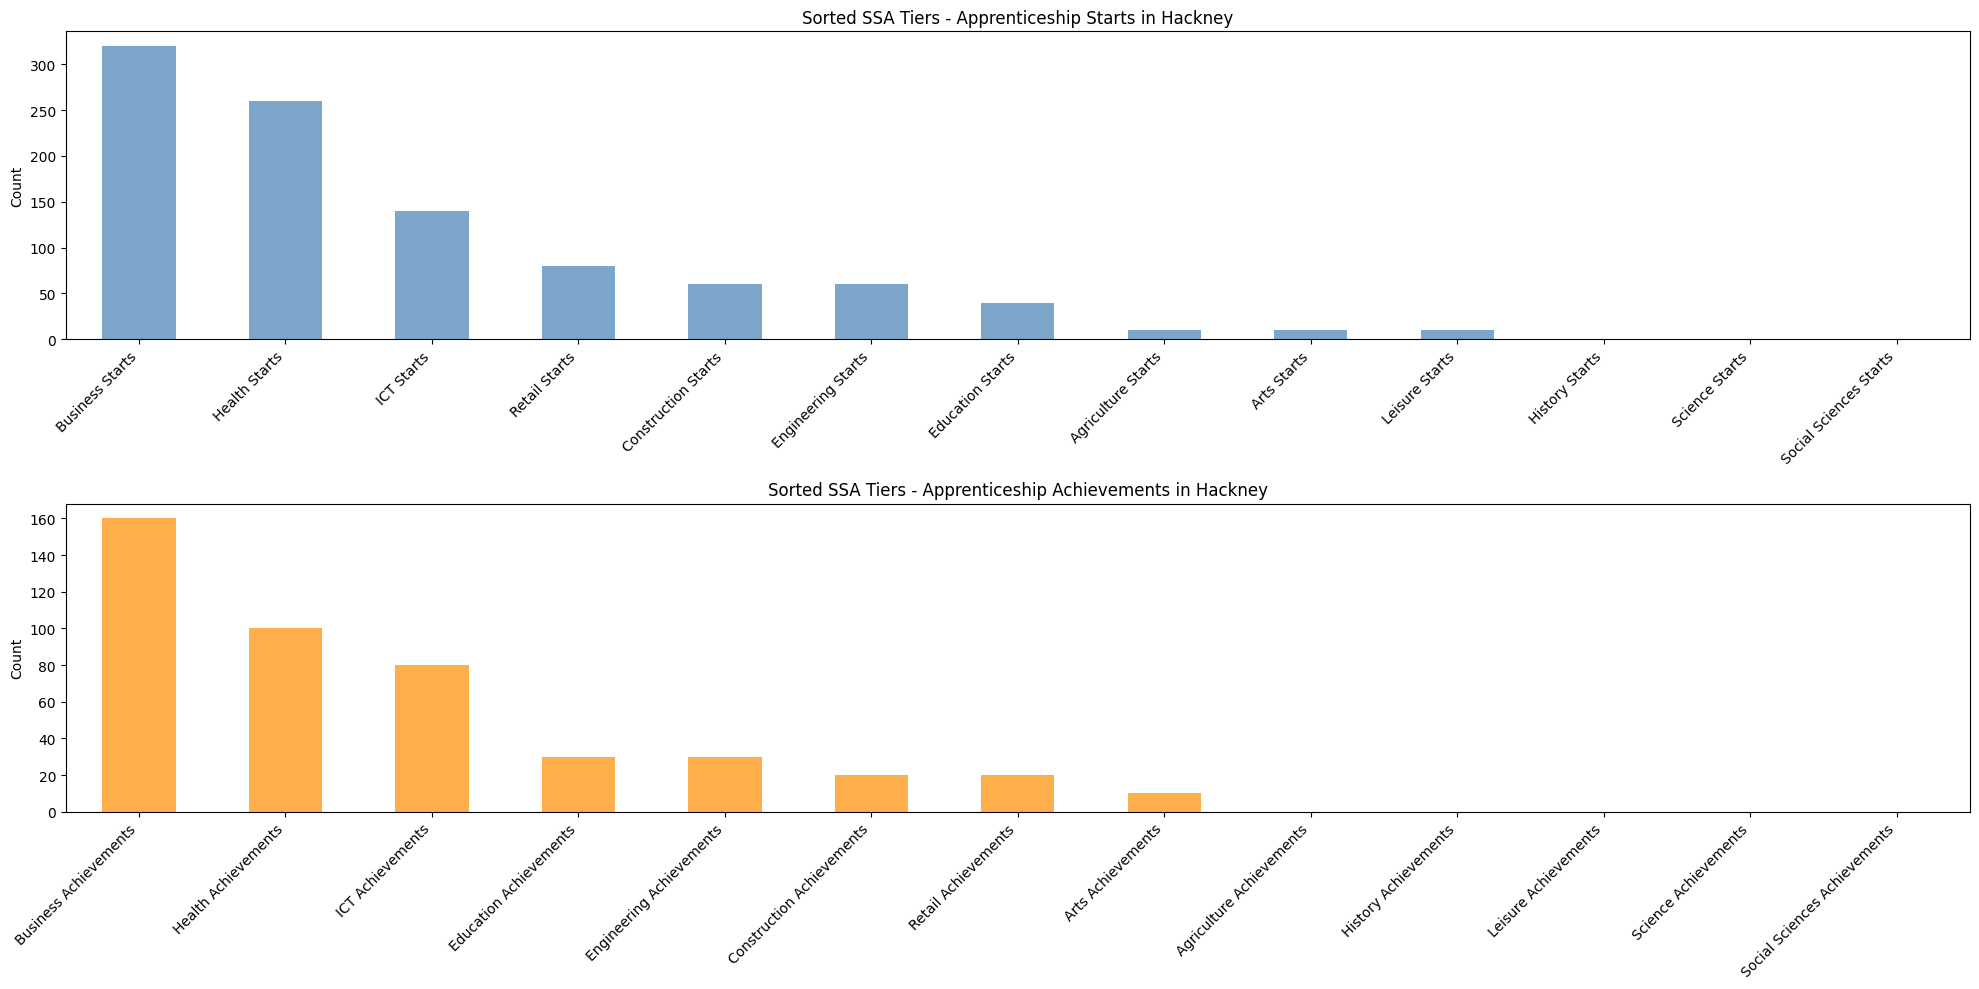

In [27]:
ssa_filtered = combined_hackney.drop(columns=[
    'Advanced Starts', 'Higher Starts', 'Intermediate Starts',
    'Advanced Achievements', 'Higher Achievements', 'Intermediate Achievements'
])

ssa_filtered = ssa_filtered.dropna()

# Transpose the dataframe to make rows
ssa_transposed = ssa_filtered.T

# Separate starts and achievements
ssa_starts = ssa_transposed[ssa_transposed.index.str.contains('Starts')].sort_values(by=0, ascending=False)
ssa_achievements = ssa_transposed[ssa_transposed.index.str.contains('Achievements')].sort_values(by=0, ascending=False)

fig, axes = plt.subplots(2, 1, figsize=(20, 10))

ssa_starts.plot(kind='bar', ax=axes[0], color='steelblue', alpha=0.7, legend=False)
axes[0].set_title("Sorted SSA Tiers - Apprenticeship Starts in Hackney")
axes[0].set_ylabel("Count")
axes[0].set_xticklabels(ssa_starts.index, rotation=45, ha='right')

ssa_achievements.plot(kind='bar', ax=axes[1], color='darkorange', alpha=0.7, legend=False)
axes[1].set_title("Sorted SSA Tiers - Apprenticeship Achievements in Hackney")
axes[1].set_ylabel("Count")
axes[1].set_xticklabels(ssa_achievements.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()


## Conclusion 📝

This notebook successfully explored data for the Hackney Local Authority District, identifying patterns in the published dataset. It was observed that totals for each category influence data processing methods, such as column removal. For example, to drop the "ethnicity" column, it was necessary first to filter out rows where `ethnicity_major` was not `"Total"`, ensuring only summary-level data remained before removing the column.

Additionally, discrepancies were found in the dataset. It appears that these were deliberately introduced by the government to suppress identification. Specifically, all values below 5 for both `starts` and `achievements` were replaced with `"low"`, likely to prevent individuals from being identifiable—especially in less common fields. This suggests intentional suppression rather than missing data, making imputation unreliable. The most reasonable approach, therefore, is to retain these suppressed values and replace `"low"` with zero, as distributions remain unknown, estimation would be speculative and numeric predictions are not planned.

These discrepancies complicate data validation. When summing totals, small inconsistencies are expected, typically within a margin of 50, due to the replacement of very small values. However, this should not affect clustering, as the goal is not trend prediction but grouping Local Authority Districts (LADs).

Data preparation is complex, involving extensive pivoting and merging to ensure `"low"` values become separate rows. This restructuring makes direct visualisation challenging. If visualisation beyond the final clustering is required, a separate notebook may be necessary.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cfb480dc-687e-4482-b857-be10c729aa58' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>